### <p style="color:blue;">Table of content
[1. Introduction](#1)<br>
[2. Loading packages](#2)<br>
[3. Loading dataset](#3)<br>
[4. Correlation](#4)<br>
[5. Features ingeneering](#5)<br>
[6. Outliers handeling](#6)<br>
[7. Balancing Dataset](#7)<br>
[8. Encoding categorical features](#8)<br>
[9. Imputing missing values](#9)<br>
[10. Build, train, and test model](#10)<br>
[11. features importance](#11)<br>
    </p>

### ***1. <a id="1"></a> Introduction*** <br>
<p style="font-family:verdana; font-size:140%;">In this notebook, I am trying to increase the accuracy of Bank Marketing prediction. This dataset has been used in many Kaggle notebooks. The accuracy scores of previous notebooks are between 80% and 97% as far as I know. I reach a prediction accuracy of 98% through outliers values handling, missing data imputation, and dataset balancing. Below is a description of the dataset features provided by the authors:</p>
<b>Input variables:</b><br>
<b>bank client data</b><br>
* 1 - age (numeric)<br>
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
<b>related with the last contact of the current campaign:</b><br>
* 8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
<b>other attributes:</b><br>
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
<b>social and economic context attributes </b><br>
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
* 20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

<b>Output variable (desired target):</b><br>
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

### ***2. <a id="2"></a> Packages Loading***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#data encoding, imputing, and model building and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import random


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv
/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv


### ***3. <a id="3"></a> Dataset loading*** 

In [2]:
df_db=pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv",sep=";")
df_db.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_db.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### ***4. <a id="4"></a> Correlation*** 

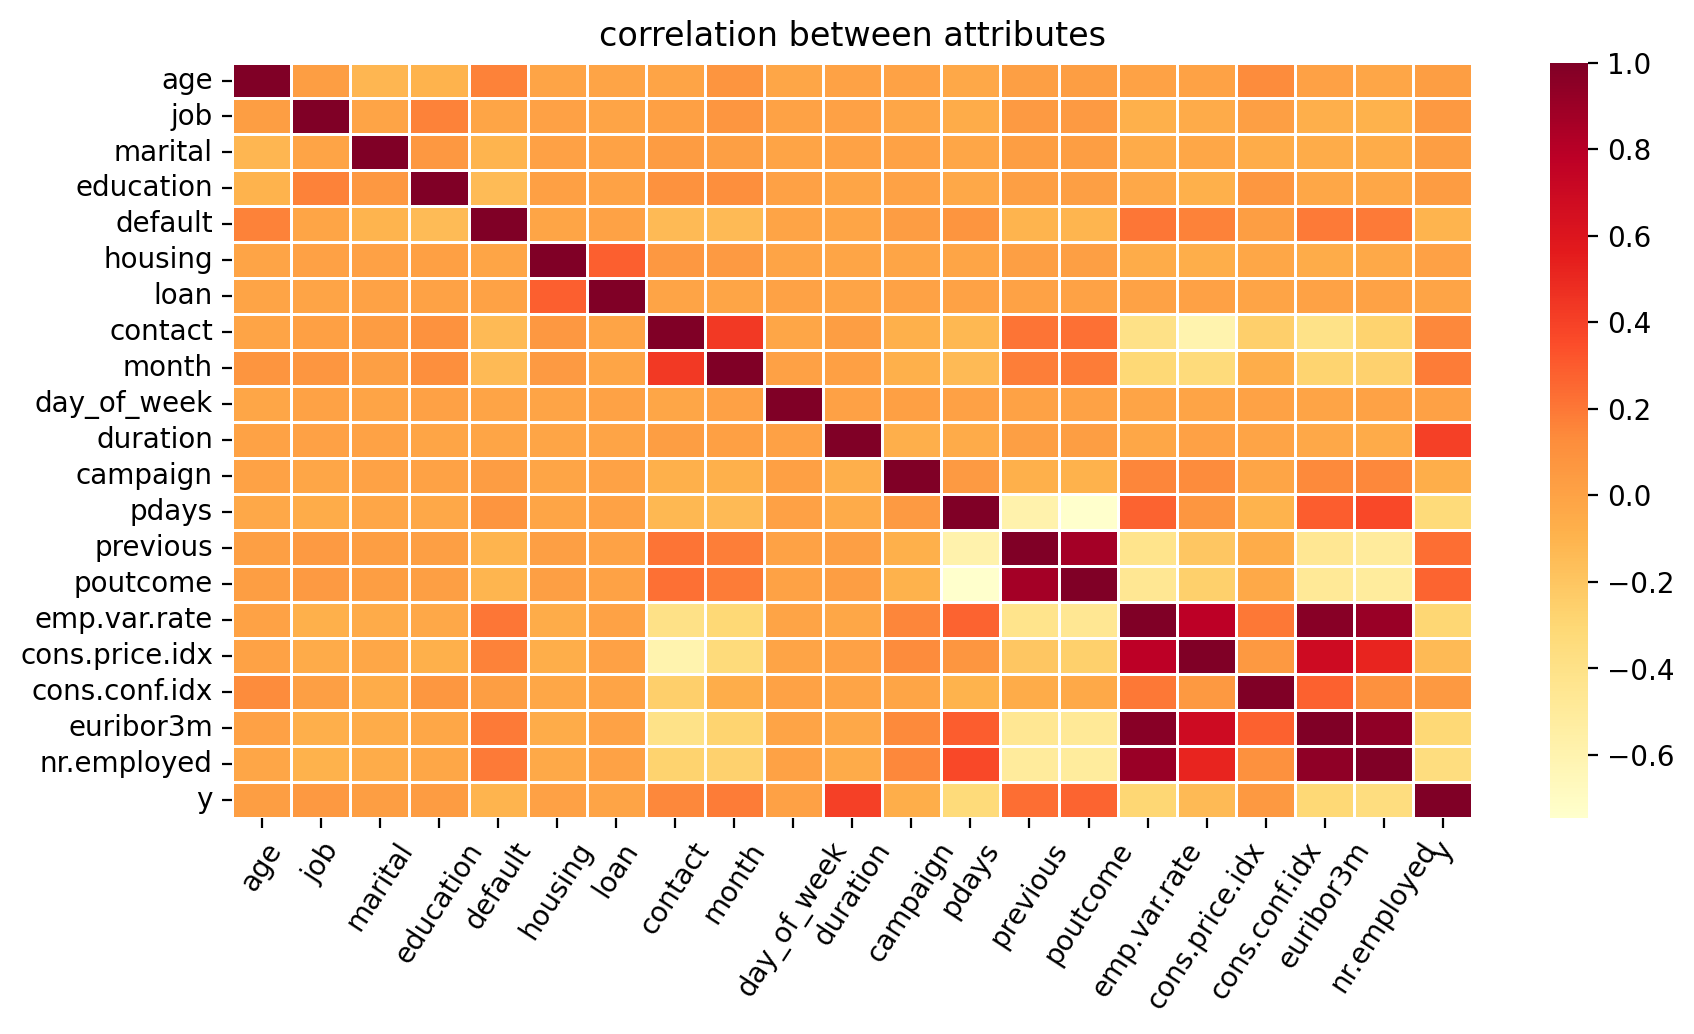

In [4]:
df_db2=df_db.copy()
for i in list(df_db.columns):
    if df_db[i].dtype == 'object':
        df_db2[i]=pd.factorize(df_db[i])[0]

plt.figure(figsize=(10, 5),dpi=200)
plt.title('correlation between attributes')
sns.heatmap(df_db2.corr(),lw=1,linecolor='white',cmap='YlOrRd')
plt.xticks(rotation=57)
plt.yticks(rotation = 0)
plt.show()
corr_matrix = df_db.corr()
#print(corr_matrix)

### ***5. <a id="5"></a>  Features ingeneering*** 
I will drop not interesting features and merge features that give similar information based on domain knowledge

In [5]:
import warnings
warnings.filterwarnings('ignore')
df_db=df_db.drop(["month","day_of_week","contact"],axis=1)
df_db["education"]=df_db["education"].replace(['basic.4y','high.school','basic.6y','basic.9y','professional.course','university.degree','illiterate',"unknown"],[4,12,6,9,14,17,0,np.nan])
df_db.housing[df_db['housing']=='no']=0
df_db.housing[df_db['housing']=='yes']=1
df_db.housing[df_db['housing']=='unknown']=np.nan
df_db.loan[df_db['loan']=='no']=0
df_db.loan[df_db['loan']=='yes']=1
df_db.loan[df_db['loan']=='unknown']=np.nan
df_db["loan"]=df_db["loan"]+df_db["housing"]
df_db.drop("housing",axis=1)
#df_db=df_db.replace('unknown',-999)


,age,job,marital,education,default,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,4.0,no,0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,12.0,unknown,0,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,12.0,no,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,6.0,no,0,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,12.0,no,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,14.0,no,1,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,14.0,no,0,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,17.0,no,1,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,14.0,no,0,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### ***6. <a id="6"></a>  Outliers handeling*** 

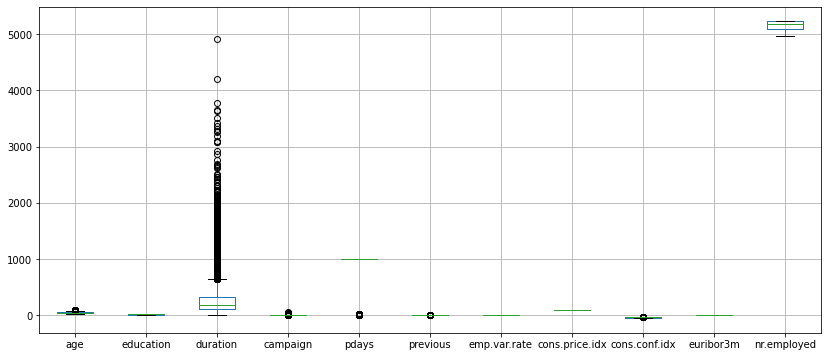

In [6]:
plt.figure(figsize=(14,6))
df_db.boxplot()
print()

<AxesSubplot:ylabel='cons.conf.idx'>

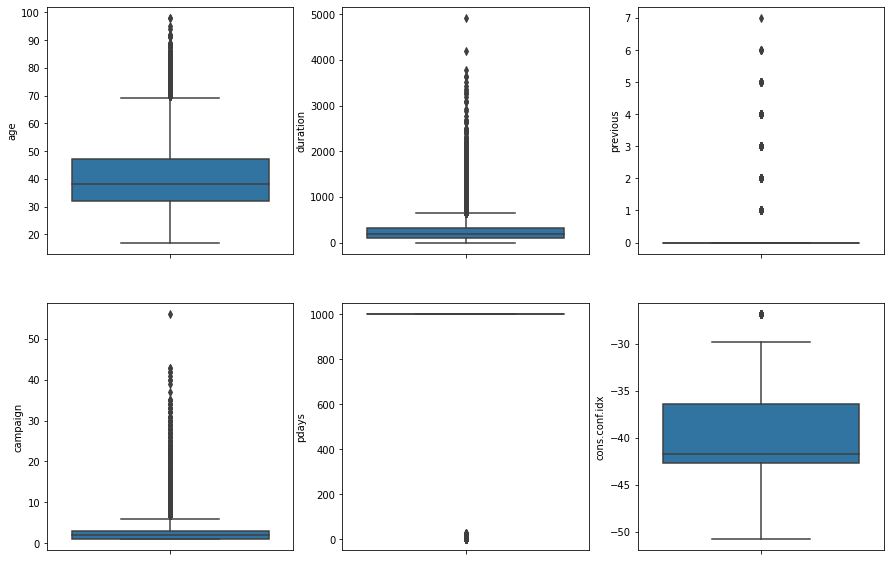

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
sns.boxplot(y=df_db["age"],ax=axs[0][0])
sns.boxplot(y=df_db["duration"],ax=axs[0][1])
sns.boxplot(y=df_db["previous"],ax=axs[0][2])
sns.boxplot(y=df_db["campaign"],ax=axs[1][0])
sns.boxplot(y=df_db["pdays"],ax=axs[1][1])
sns.boxplot(y=df_db["cons.conf.idx"],ax=axs[1][2])

In [8]:
Q1 = df_db['duration'].quantile(.25)
Q3 = df_db['duration'].quantile(.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_db = df_db[df_db['duration'] >= lower] 
df_db = df_db[df_db['duration'] <=upper] 

In [9]:
Q1 = df_db['age'].quantile(.20)
Q3 = df_db['age'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_db = df_db[df_db['age'] >= lower] 
df_db = df_db[df_db['age'] <=upper] 

Q1 = df_db['previous'].quantile(.20)
Q3 = df_db['previous'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_db = df_db[df_db['previous'] >= lower] 
df_db = df_db[df_db['previous'] <=upper] 

### ***7. <a id="7"></a> Dataset balancing*** 

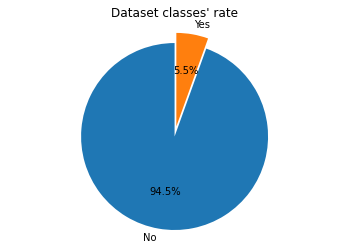

In [10]:
values=df_db["y"].value_counts().tolist()
values=[i * 100/sum(values) for i in values]
labels=["No","Yes"]
scale=values[0]/values[1]
explode = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Dataset classes\' rate')
plt.show()

In [11]:
df_db["y"]=df_db["y"].replace("no",0)
df_db["y"]=df_db["y"].replace("yes",1)
df_classe_majority = df_db[df_db.y==0]
df_classe_minority = df_db[df_db.y==1]
# Upsample of minority class
from sklearn.utils import resample
df_classe_minority_upsampled = resample(df_classe_minority, 
                                           replace = True,     
                                           n_samples =df_classe_majority.shape[0],   
                                           random_state = 150) 
df_db = pd.concat([df_classe_majority, df_classe_minority_upsampled])
Y = df_db["y"]
X = df_db.drop(['y'], axis=1)

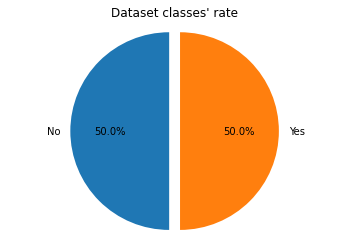

In [12]:
values=df_db["y"].value_counts().tolist()
values=[i * 100/sum(values) for i in values]
labels=["No","Yes"]
scale=values[0]/values[1]
explode = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Dataset classes\' rate')
plt.show()

### ***8. <a id="8"></a> categorical features*** 

In [13]:
categoricals=['job','marital','default','poutcome','campaign']
labelencoder = LabelEncoder()
for c in categoricals:
    X[c]      = labelencoder.fit_transform(X[c]) 
X.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,4.0,0,0,0,261,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,12.0,1,0,0,149,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,12.0,0,1,1,226,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,6.0,0,0,0,151,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,12.0,0,0,1,307,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0


### ***9. <a id="9"></a>  Imputing missing values*** 

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=9)
X=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

### ***10. <a id="10"></a> Build, train, and test model*** 

In [15]:
seed = 42
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [16]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_dtc_pred = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_dtc_pred)
print("Accuracy: {0:.4f}".format(accuracy_dtc))
print()


Accuracy: 0.9803



In [17]:
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, r2_score, classification_report
k_fold = KFold(n_splits=7, shuffle=False, random_state=None)
print("Mean accuracy",(cross_val_score(dtc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()))
print(classification_report(y_test, y_dtc_pred))

Mean accuracy 0.9771383663107558
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9269
           1       0.96      1.00      0.98      9366

    accuracy                           0.98     18635
   macro avg       0.98      0.98      0.98     18635
weighted avg       0.98      0.98      0.98     18635



### ***11. <a id="11"></a>  features importance*** 

Text(0.5, 0, 'Relative Importance')

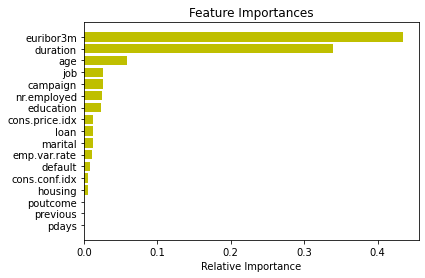

In [18]:
features=X.columns
importances =dtc.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')